# Exploring the OBP Data

- Exploring the OBP data 
- Understanding the components and distributions of the data
- See if there are any implications for the algorithms we intend to use 

In [ ]:
# Load Olivers functions
from load_opb import load_obp_dataset, preview_dataset

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [55]:
# Load and explore
data = load_obp_dataset(campaign="all", n_rounds=50000) 

INFO:obp.dataset.real:When `data_path` is not given, this class downloads the example small-sized version of the Open Bandit Dataset.
/Users/timothycassel/Desktop/Data Science MSc/Semester 3/Reinforcement Learning/contextual-bandit-benchmark/.venv/lib/python3.12/site-packages/obp/dataset/real.py:192: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  item_feature_cat = self.item_context.drop("item_feature_0", 1).apply(
/Users/timothycassel/Desktop/Data Science MSc/Semester 3/Reinforcement Learning/contextual-bandit-benchmark/.venv/lib/python3.12/site-packages/obp/dataset/real.py:195: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  self.action_context = pd.concat([item_feature_cat, item_feature_0], 1).values


**Data Structure**

```
data = {
    "context": bandit_feedback["context"],     # User/situation features
    "action": bandit_feedback["action"],       # Which fashion item was shown
    "reward": bandit_feedback["reward"],       # Did user click? (0/1)
    "pscore": bandit_feedback["pscore"],       # True probability of selecting that action
    "n_actions": dataset.n_actions,            # Total number of possible fashion items
}
```

In [56]:
# Store reward 
rewards = data['reward']

# Check the distribution of rewards 
unique_values, counts = np.unique(rewards, return_counts=True)
print("Unique values:", unique_values)
print("Counts:", counts)
print((38/10_000)*100, "%")

Unique values: [0 1]
Counts: [9962   38]
0.38 %


Rewards are super sparse. Only 38 users actually clicked on the ad, which is 0.38% of the total users. 

Unique values - actions: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Counts: [122 160 131 126 121  98 131 146 139 126 140 120 114 129 127 137 111 123
 119 128 132 134  96 124 127 131 111 110 126 126 105 130 126 144 135 110
 122 136 122 100 132 136 115 126 136 134 154 116 115 114 136 113 136 105
 157 126 137 149 112 113 113 104 129 114 133 121 125 103 129 125 124 126
 133 124 111 127 122 108 134 138]


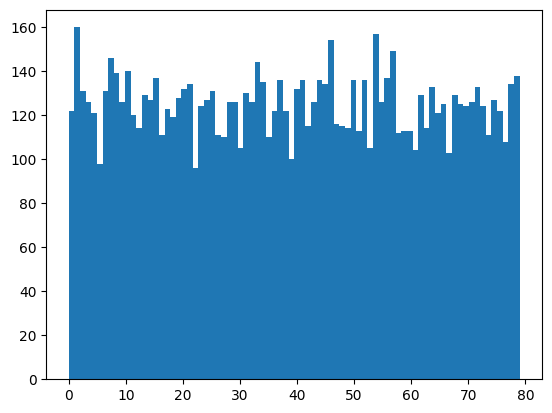

In [49]:
# Store actions (fashion items shown)
actions = data['action']

# Check the distribution  of actions 
unique_values, counts = np.unique(actions, return_counts=True)
print("Unique values - actions:", unique_values)
print("Counts:", counts)

plt.hist(actions, bins=80)
plt.show()

Actions are shown in roughly equal proportions, but we can look at the most popular and leas popular ones too 

In [50]:
# Action distribution - are some items shown way more than others?
unique_actions, action_counts = np.unique(data['action'], return_counts=True)
print(f"Number of unique actions: {len(unique_actions)}")
print(f"Most popular action shown {action_counts.max()} times")
print(f"Least popular action shown {action_counts.min()} times")

Number of unique actions: 80
Most popular action shown 160 times
Least popular action shown 96 times


In [51]:
# Which actions got the rewards?
rewarded_actions = data['action'][data['reward'] == 1]
print(f"Actions that got clicks: {np.unique(rewarded_actions)}")

Actions that got clicks: [ 1  3  6  7  8  9 17 18 21 25 28 34 36 38 41 44 45 46 47 48 49 50 53 57
 58 61 65 69 71]


In [52]:
# Success rate by action (for actions that got clicks)
for action in np.unique(rewarded_actions):
    action_mask = data['action'] == action
    success_rate = data['reward'][action_mask].mean()
    total_shown = action_mask.sum()
    print(f"Action {action}: {success_rate:.3f} click rate ({total_shown} times shown)")

Action 1: 0.006 click rate (160 times shown)
Action 3: 0.008 click rate (126 times shown)
Action 6: 0.015 click rate (131 times shown)
Action 7: 0.007 click rate (146 times shown)
Action 8: 0.007 click rate (139 times shown)
Action 9: 0.008 click rate (126 times shown)
Action 17: 0.008 click rate (123 times shown)
Action 18: 0.017 click rate (119 times shown)
Action 21: 0.007 click rate (134 times shown)
Action 25: 0.008 click rate (131 times shown)
Action 28: 0.008 click rate (126 times shown)
Action 34: 0.007 click rate (135 times shown)
Action 36: 0.016 click rate (122 times shown)
Action 38: 0.008 click rate (122 times shown)
Action 41: 0.007 click rate (136 times shown)
Action 44: 0.015 click rate (136 times shown)
Action 45: 0.007 click rate (134 times shown)
Action 46: 0.006 click rate (154 times shown)
Action 47: 0.009 click rate (116 times shown)
Action 48: 0.009 click rate (115 times shown)
Action 49: 0.026 click rate (114 times shown)
Action 50: 0.007 click rate (136 times s

In [53]:
# 1. Do you have enough positive examples to learn from?
n_clicks = data['reward'].sum()
print(f"Total clicks: {n_clicks}")
# Need at least ~100+ for meaningful learning

# 2. Are contexts standardized? (Neural networks are picky)
print(f"Context range: [{data['context'].min():.2f}, {data['context'].max():.2f}]")
print(f"Context std: {data['context'].std():.2f}")
# If not roughly [-2, 2] range, you'll need to normalize

# 3. Action space size (affects network architecture)
print(f"Actions: {data['n_actions']}")
# This determines your output layer size

Total clicks: 38
Context range: [0.00, 1.00]
Context std: 0.35
Actions: 80
